<a href="https://colab.research.google.com/github/JonathanCornish/Portfolio_Monte_Carlo/blob/master/Portfolio_Monte_Carlo_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo simulation for portfolio returns & drawdowns given various levels of leverage, concentration, vol etc:

Important assumptions in this model include:


*   Long and short portfolios are uncorrelated to one another
*   Expected return is constant over time
*   Expected volatility is constant over time
*   Expected vol & expected returns are each the same for every stock in the long portfolio
*   Expected vol & expected returns are each the same for every stock in the short portfolio
*   Monthly rebalancing occurs for all the stocks in the long & short portfolios such that the long and short portfolios are each equally-weighted at the start of each month
*   Monthly rebalancing also occurs at the portfolio level at the start of each month so the gross exposure % is the same every month
*   It's assumed that there's no rebalancing costs
*   We only experience portfolio moves once/month (in real life the greater the frequency, the wider the potential return paths are...)




In [53]:
## Let's try to make money without getting our heads blown off.
## Import the required libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random    
import pandas as pd

## increase the default plotsize
from pylab import rcParams
rcParams['figure.figsize'] = 14,7

In [71]:
# create a function that plots portfolio return over time. 
# the imaginary long portfolio is designated a random return for the monthly period, using np.random.normal(mean, std_dev). Same thing for the short portfolio
# the imaginary long portfolio and short portfolio's returns are summed each period to generate the monthly return.
# be sure to type all of the inputs into this formula in decimal places...

# This function takes the following arguments:
#0. num_simulations = the number of simulations we're going to run
#1. beg_account_value = how much money we start with. This doesn't really matter, I've assumed $100m
#2. num_months = the number of months we run this simulation for
#3. long_ann_std_dev = annual standard deviation of each long position (they're assumed to all be the same)
#4. short_ann_std_dev = same thing as above but for short positions
#5. num_long_positions = the number of long positions in the long book. I assume they're each equally weighted...
#6. num_short_positions = same as above but for short positions
#7. long_cor = proxy for correlation of the long positions to one another. I assume all the long positions move ~in sync with one another within this range... it's not technically correlation!
#9. short_cor = same as above but for short positions
#10. long_ann_expected_ret = expected annual return of the long positions. They're each expected to have the same long-term expected return, but with differing returns each month based on the long_cor
#11. short_ann_expected_ret = same as above but for short positions. This number is the expected return of the stocks that you're short. So, if you're short AAPL and AAPL has expected return of 5%, put 0.05 (not -0.005) !!
#12. long_exp = long exposure. E.g. 1.2 means 120% long
#13. short_exp = same as above but for short exposure. Keep this as a positive number i.e. not negative

def portfolio_return(num_simulations, beg_account_value, num_months, long_ann_std_dev, short_ann_std_dev, num_long_positions, num_short_positions, long_cor, short_cor, long_ann_expected_ret, short_ann_expected_ret, long_exp, short_exp):
    for x in range(num_simulations):
      
      month_list = [0]
      account_value = [beg_account_value]

      monthly_ret = 0

      for month in range(num_months):
        # assign a monthly periodic return to the long portfolio which the individual stock returns (that we calculate later) will center around
        long_monthly_return = np.random.normal(long_ann_expected_ret / 12, long_ann_std_dev / 12)
        # assign a monthly periodic return to the short portfolio which the individual stock returns (that we calculate later) will center around
        short_monthly_return = np.random.normal(short_ann_expected_ret / 12, short_ann_std_dev / 12)
        
        # create two empty lists that we'll later use to store the long and short attributions in for each position in the long & short books
        long_attrs = []
        short_attrs = []

        # for each long position in the long portfolio...
        for long_pos in range(num_long_positions):
          # append to the end of the long_attrs list the attribution of each of these stocks. We assume monthly rebalancing at the position and gross exposure level
          # the long_attrs is calculated as the position exposure multipled by the monthly return we calculated above for the long portfolio
          # multipled by a random number between the long_cor (e.g. 0.8) and (1 + (1 - long cor)) (i.e. in this example, 1 + (1 - 0.8) = 1.2)
          long_attrs.append((long_exp / num_long_positions) * (1 + long_monthly_return) * random.uniform(long_cor, 1 + (1 - long_cor)))
        
        for short_pos in range(num_short_positions):
          # same process for the shorts
          short_attrs.append((short_exp / num_short_positions) * (1 + short_monthly_return) * random.uniform(short_cor, 1 + (1 - short_cor)))
        
        monthly_ret = (sum(long_attrs) - sum(short_attrs))
        month_list.append(month)
        account_value.append(account_value[-1] * monthly_ret)
      # plt.plot(month_list, account_value)
      # plt.xlabel("Number of Months")
      # plt.ylabel("Account Value")
      # plt.show()
      simulation_df[x] = account_value
      # simulation_df.style.format("${x:,.0f}")

    fig, ax = plt.subplots()
    formatter = ticker.FormatStrFormatter('$%1.0f')
    # formatter = ticker.FormatStrFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    plt.xlabel("Number of Months")
    plt.ylabel("Account Value")
    # fmt = '${x:,.0f}'
    # tick = mtick.StrMethodFormatter(fmt)
    # fig.yaxis.set_major_formatter(tick) 
    plt.xticks(rotation=25)
    plt.plot(simulation_df)
    plt.show()

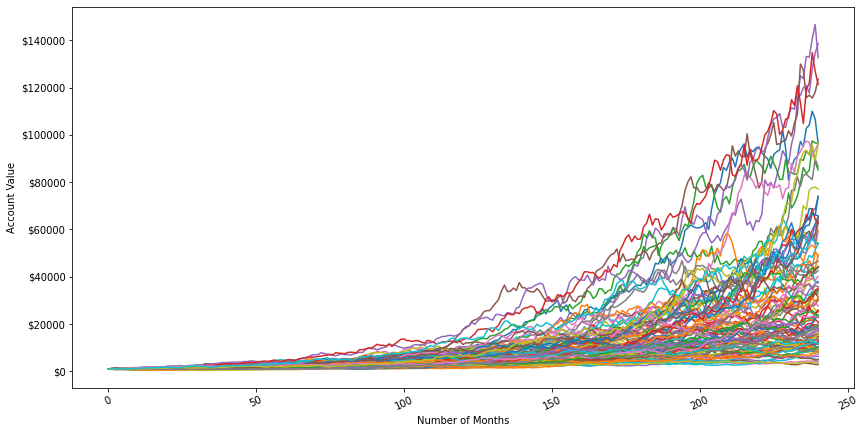

In [72]:
# Run the portfolio returns function & output the graph. The inputs used are the following:
#0. num_simulations = 100
#1. beg_account_value = $1,000
#2. num_months = 240 (i.e. 20 years)
#3. long_ann_std_dev = 30%
#4. short_ann_std_dev = 30%
#5. num_long_positions = 15
#6. num_short_positions = 30
#7. long_cor = 75% (so, all the long positions fall within 0.75 and 1.25 of the average long...)
#9. short_cor = 75% (so, all the short positions fall within 0.75 and 1.25 of the average short...)
#10. long_ann_expected_ret = 15%
#11. short_ann_expected_ret = 0%
#12. long_exp = 120%
#13. short_exp = 20%

# First we have to create an empty dataframe:
simulation_df = pd.DataFrame()
# Then run the function with the above-specified inputs:
portfolio_return(100, 1000, 240, 0.3, 0.3, 15, 30, 0.75, 0.75, 0.15, 0.0, 1.2, 0.2)

In [73]:
# Show the first five rows (head) of the table we created when we ran the cell above. 
# There are 100 columns because we specified that we're running 100 simulations in the function inputs above.
# We can see that all the columns start at 100 at time zero, and then change based on our randomly calculated monthly returns:
simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,977.661972,1030.035273,1035.204252,971.373952,963.888700,1010.642126,1072.788017,983.414414,973.603665,953.488920,1069.673099,1013.778679,919.824020,1062.660075,1017.848195,924.143070,1023.207303,1059.531918,970.067044,1055.524708,978.674917,942.643461,980.200696,1011.764184,956.410158,1117.751940,899.484312,1102.912511,980.413572,1187.022492,1023.769445,1026.745952,992.929483,1062.879258,932.698894,1155.882880,1015.058373,1136.776925,891.369789,1027.912479,...,1012.317052,998.888553,983.603227,1017.508951,983.030624,932.556102,985.907385,1067.590384,1019.200059,981.592169,976.266371,1050.977866,1066.541979,1015.215510,972.213675,985.782804,932.526857,1011.598507,1070.562912,1008.187538,1067.209417,1034.631644,1030.015882,943.416643,1037.766381,1063.296852,1029.759195,1045.929704,1092.890728,966.144329,1139.051305,926.836797,997.581293,1025.716567,889.482925,1080.050512,1039.395643,1050.118331,1005.551886,1024.250573
2,1032.937946,1172.359463,1066.066003,931.080286,928.556098,993.566404,1047.960402,1004.202488,960.942014,894.299594,1076.216342,1132.358878,928.032945,1104.047194,995.052807,985.221429,1091.879226,1122.699073,1026.605562,1098.785486,1072.142461,1048.069617,1001.521171,1017.220193,991.056054,1096.038299,924.847068,1100.026127,965.606995,1048.464464,1067.878965,1070.804566,1001.479997,1102.458652,894.780203,1175.311302,1052.480454,1121.423348,850.348112,909.341637,...,993.134141,1020.649131,1045.226164,1044.397047,1028.616100,848.804668,995.774299,1112.302436,1118.594885,1046.563372,977.939892,1031.556557,1040.766102,964.424709,1016.177995,1013.421439,969.781223,1062.283557,1089.964539,1006.627420,1190.998293,1030.842544,983.882085,1013.562837,1090.909535,1073.456056,1116.157790,1113.369749,1186.646688,1031.186980,1215.025713,823.630070,1084.720487,1086.108937,870.413560,1253.882108,1142.300085,1154.944317,1044.917496,1109.193237
3,1118.306521,1121.298611,1123.163490,920.373924,961.993274,1026.177850,1016.462570,997.465778,999.839042,982.924267,1055.910371,1110.468220,1005.216182,1085.721703,911.616439,1087.640982,1114.987997,1179.505796,1089.980163,1073.376338,1047.739464,1050.132024,1004.374880,991.132139,1064.782479,1076.958418,1010.819497,1176.104124,945.961164,1025.572242,945.082883,1032.318116,1065.565080,1190.230264,835.168536,1152.188191,1074.887075,1142.928613,839.554457,896.698042,...,1012.964248,1089.045540,1031.698477,985.207095,991.854801,915.057184,1016.593099,1146.671722,1105.282405,1025.534249,983.069632,1017.417622,1066.920253,1029.843983,1084.566900,1052.547588,963.905740,1205.256731,1105.064004,1010.985986,1265.887366,967.429901,893.853221,1087.573106,1022.052269,1111.758708,1158.270461,1101.149413,1110.048629,1094.528312,1208.121344,742.013048,1139.402927,1144.055479,800.654686,1175.522963,1130.914343,1164.307392,11

In [74]:
# Show the last five rows (tail) of the table we created when we ran the cell above.
# We can see that there are 240 rows total in the whole dataframe (only 5 shown here). This is because we ran this for 240 months i.e. 20 years:
simulation_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
236,13394.545449,14885.522991,12123.197842,11123.375804,133196.833283,44551.710682,30953.466643,18701.556400,28407.128698,32044.902726,9676.122304,11957.966353,83640.164845,22629.700775,10649.207194,26048.018138,36229.187996,9987.380765,38405.789343,46126.929476,63854.563994,44510.137695,16313.127864,19744.802759,6066.869944,3467.822301,26247.793139,36494.424651,27783.227922,42124.211580,102758.720836,50669.097769,93323.570113,12320.087481,12757.425201,14227.870690,4403.226479,45093.233059,8074.552676,5757.534599,...,12216.797605,21098.339148,40023.182139,23505.358913,15866.334934,13269.819663,6109.760939,14735.902504,10312.450310,8514.082152,18641.663636,10766.783769,9039.127604,29352.433276,50093.997019,5481.667559,97425.601430,40739.351643,12521.666946,12539.490324,61634.782310,27372.599256,22488.065113,66260.572525,120862.703796,58287.230962,22880.900412,8310.896286,3775.409690,11074.863978,63395.640992,6856.556976,25121.278503,119374.973302,17604.682789,40242.947176,39252.853578,16957.581210,93518.124065,51393.511881
237,13930.149719,14694.544521,12419.900688,11279.199769,132866.947772,42437.804595,30495.253359,19225.942896,28033.728870,32322.623443,8780.905791,12024.039905,85033.885945,22617.089101,10710.736910,26591.518051,37315.734588,9316.427522,38420.628551,49030.224992,68871.124276,46833.846756,18055.406757,20233.368954,6638.157832,3290.694477,28975.617748,36742.422386,29584.410808,41546.722557,104220.644701,52377.708097,91579.785177,11976.042357,14432.518936,14182.598629,4305.729987,45251.531979,7761.172094,6097.776655,...,12578.463851,21997.595039,42487.611085,27423.082058,15699.968141,13087.887885,6341.146878,15057.326111,10057.620684,8602.856192,18130.245690,10602.609411,9052.548811,31557.641181,56623.213965,5455.485896,96905.572995,44654.248317,13281.129147,13311.184824,61899.376494,28723.742480,22415.791608,63948.428366,117718.019808,59332.383990,22861.356560,8747.933773,3872.573950,11448.697655,65288.155041,6635.999170,24936.919667,121816.229062,17547.098731,42370.068178,39190.194734,16897.630946,91675.462415,54418.715276
238,15084.436610,14975.375686,11072.916685,10283.964552,140672.495879,39920.767276,32675.078400,17985.114616,27895.686348,33773.300705,8472.394827,12539.976110,95371.237459,22679.123520,10339.675753,27864.055792,35461.230344,9579.995114,39181.883686,48182.155332,68739.855570,44616.678344,19392.966949,20160.544310,6325.601210,3185.566675,30592.498206,34598.482214,31012.069394,41479.679994,109975.907861,53432.498995,97423.586242,12140.914620,15628.869570,14741.385097,4343.358248,44542.334352,7486.232564,5513.304036,...,11744.926345,21543.775018,43920.222468,24542.153502,16474.397332,13395.924866,6429.097701,14531.986457,10622.524132,8533.310524,20647.176384,9583.650969,9651.872477,30680.159162,59534.227624,5316.350313,91043.114883,45299.913779,13313.004414,13454.582849,66619.120747,31181.312996,23149.108684,68723.252994,127912.428820,55544.483202,23129.995061,8905.876719,3771.071298,12380.269947,66974.230480,7410.134978,25749.641744,134784.581945,18946.547251,41764.468408,39343.295907,18262.953181,95462.086557,56259.593128
239,15005.358962,15879.175401,11093.013362,11721.875895,146711.369141,43144.175345,33983.235350,17180.739037,26033.888006,33685.830560,8159.607253,13219.348258,88529.697963,24234.985538,11294.437327,28097.116052,33096.467072,9893.360650,38038.846596,51401.605550,68448.206843,43299.573892,18936.927576,21983.474992,6274.371441,2897.150113,33003.600073,36241.641061,32854.510164,37988.960854,106664.812021,52107.152889,96624.911094,12059.488025,17350.291179,15484.455543,4396.973603,41466.198931,7647.661189,5145.720221,...,10334.112118,22653.669509,42606.391439,24650.434561,16702.465951,13388.818640,6925.536275,15710.553725,9874.533584,9419.432002,22

In [116]:
# Now let's run some analytics on this dataframe to see what our data looks like:
last_row = simulation_df.tail(1)
mean_return = f"{last_row.mean(axis=1).values[0]:,.2f}"
median_return = f"{last_row.median(axis=1).values[0]:,.2f}"
max_return = f"{last_row.max(axis=1).values[0]:,.2f}"
min_return = f"{last_row.min(axis=1).values[0]:,.2f}"
upper_quartile_return = f"{np.percentile(last_row, 75, axis=1)[0]:,.2f}"
bottom_quartile_return = f"{np.percentile(last_row, 25, axis=1)[0]:,.2f}"

beg_val = 1000
months_total = 240
mean_irr = (np.power((last_row.mean(axis=1).values[0] / beg_val), (12 / months_total)))-1
median_irr = (np.power((last_row.median(axis=1).values[0] / beg_val), (12 / months_total)))-1
max_irr = (np.power((last_row.max(axis=1).values[0] / beg_val), (12 / months_total)))-1
min_irr = (np.power((last_row.min(axis=1).values[0] / beg_val), (12 / months_total)))-1
# up_quart_irr = ((np.power(np.percentile(last_row, 75, axis=1)[0] / beg_val), (12 / months_total)))-1
# bot_quart_irr = ((np.power(np.percentile(last_row, 25, axis=1)[0] / beg_val), (12 / months_total)))-1

print(f'mean return = ${mean_return} for an IRR of {mean_irr:.2%}')
print(f'median return = ${median_return} for an IRR of {median_irr:.2%}')
print(f'max return = ${max_return} for an IRR of {max_irr:.2%}')
print(f'min return = ${min_return} for an IRR of {min_irr:.2%}')
# print(f'upper quartile return = ${up_quart_irr} for an IRR of {up_quart_irr:.2%}')
# print(f'lower quartile return = ${bot_quart_irr} for an IRR of {bot_quart_irr:.2%}')

mean return = $36,019.56 for an IRR of 19.63%
median return = $25,540.19 for an IRR of 17.59%
max return = $138,568.98 for an IRR of 27.96%
min return = $2,882.50 for an IRR of 5.44%


In [ ]:
# Feel free to try this with your own inputs:

#0. num_simulations = 100
#1. beg_account_value = $1,000
#2. num_months = 240 (i.e. 20 years)
#3. long_ann_std_dev = 30%
#4. short_ann_std_dev = 30%
#5. num_long_positions = 15
#6. num_short_positions = 30
#7. long_cor = 75% (so, all the long positions fall within 0.75 and 1.25 of the average long...)
#9. short_cor = 75% (so, all the short positions fall within 0.75 and 1.25 of the average short...)
#10. long_ann_expected_ret = 15%
#11. short_ann_expected_ret = 0%
#12. long_exp = 120%
#13. short_exp = 20%

# First we have to create an empty dataframe:
simulation_df = pd.DataFrame()
# Then run the function with the specified inputs:
portfolio_return(100, 1000, 240, 0.1, 0.1, 15, 30, 0.75, 0.75, 0.15, 0.0, 1.2, 0.2)